# Medical Cost Personal Datasets

## Insurance Forecast by using Linear Regression

OUTLINE:
    1. Download the dataset
    2. Explore and Analyze the data
    3. Prepare the dataset for ML training
    4. Train the model
    5. Make prediction
    6. Documentation
    

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import seaborn as sns


# Analyze the dataset

Read data from csv

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
print (data.shape)

(1338, 7)


In [4]:
print (data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Data has 1338 entries and 7 columns :  age, sex, bmi, children, smoker, region, charges

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The count of each column is same thus there are No Null entries in the dataset. 
The dataset has no unique identifying column thus we are using external indexing
Columns and the their Data Types:
Age : Integer
Sex : String
BMI : Float
Children : Integer 
Smoker : String
Region :  String
Charges : Float


In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No NAN values

# EDA

In [20]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

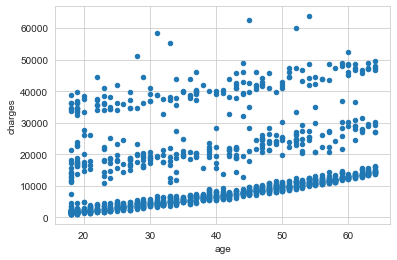

In [21]:
data.plot(kind='scatter', x='age',y='charges') ;
plt.show()

We can observe that the charges increase with age.

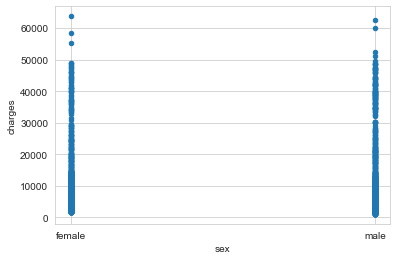

In [22]:
data.plot(kind='scatter', y='charges', x='sex') ;
plt.show()

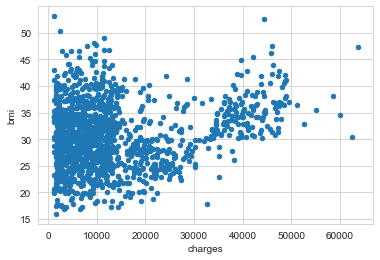

In [23]:
data.plot(kind='scatter', x='charges', y='bmi') ;
plt.show()

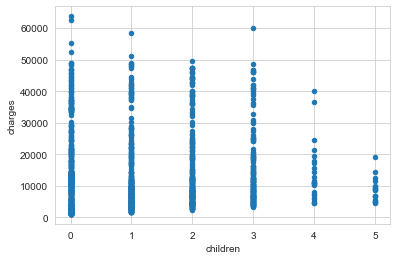

In [24]:
data.plot(kind='scatter', y='charges', x='children') ;
plt.show()

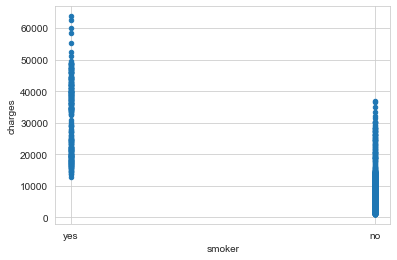

In [25]:
data.plot(kind='scatter', y='charges', x='smoker') ;
plt.show()

The minimum of charges for smoker are more than then non-smokers. As we can see non-smoker charges start from 0 and smoker charges start from 12000

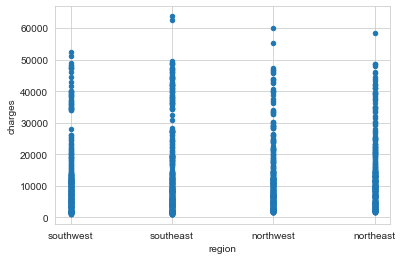

In [26]:
data.plot(kind='scatter', y='charges', x='region') ;
plt.show()

The region doesnt affect the charges 

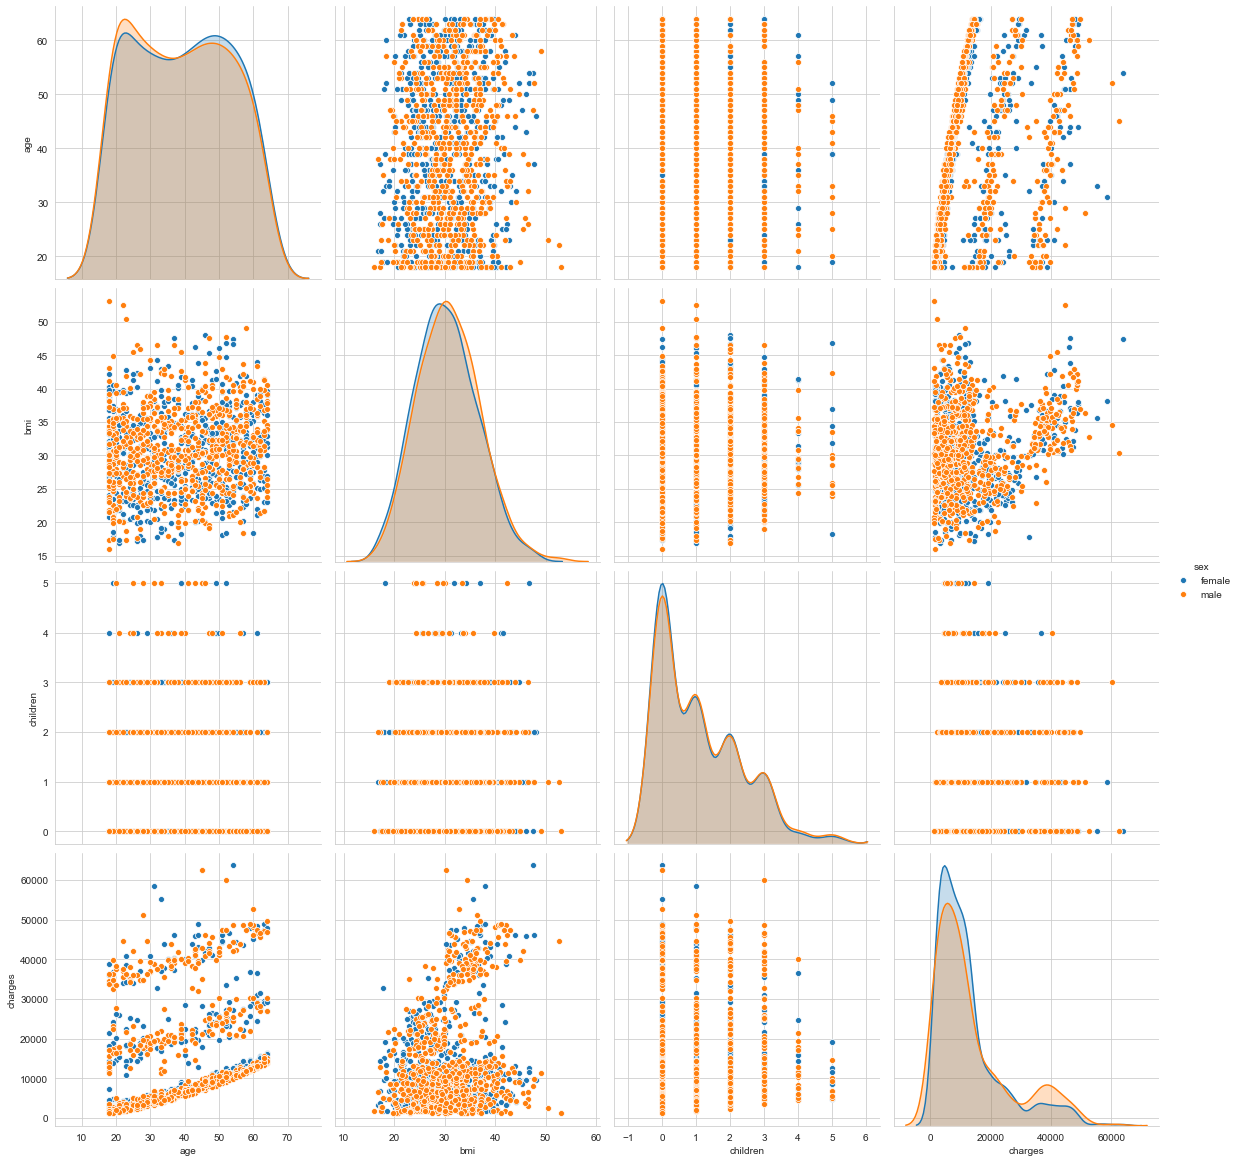

In [27]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, height=4,diag_kind="kde",hue ='sex');
plt.show()

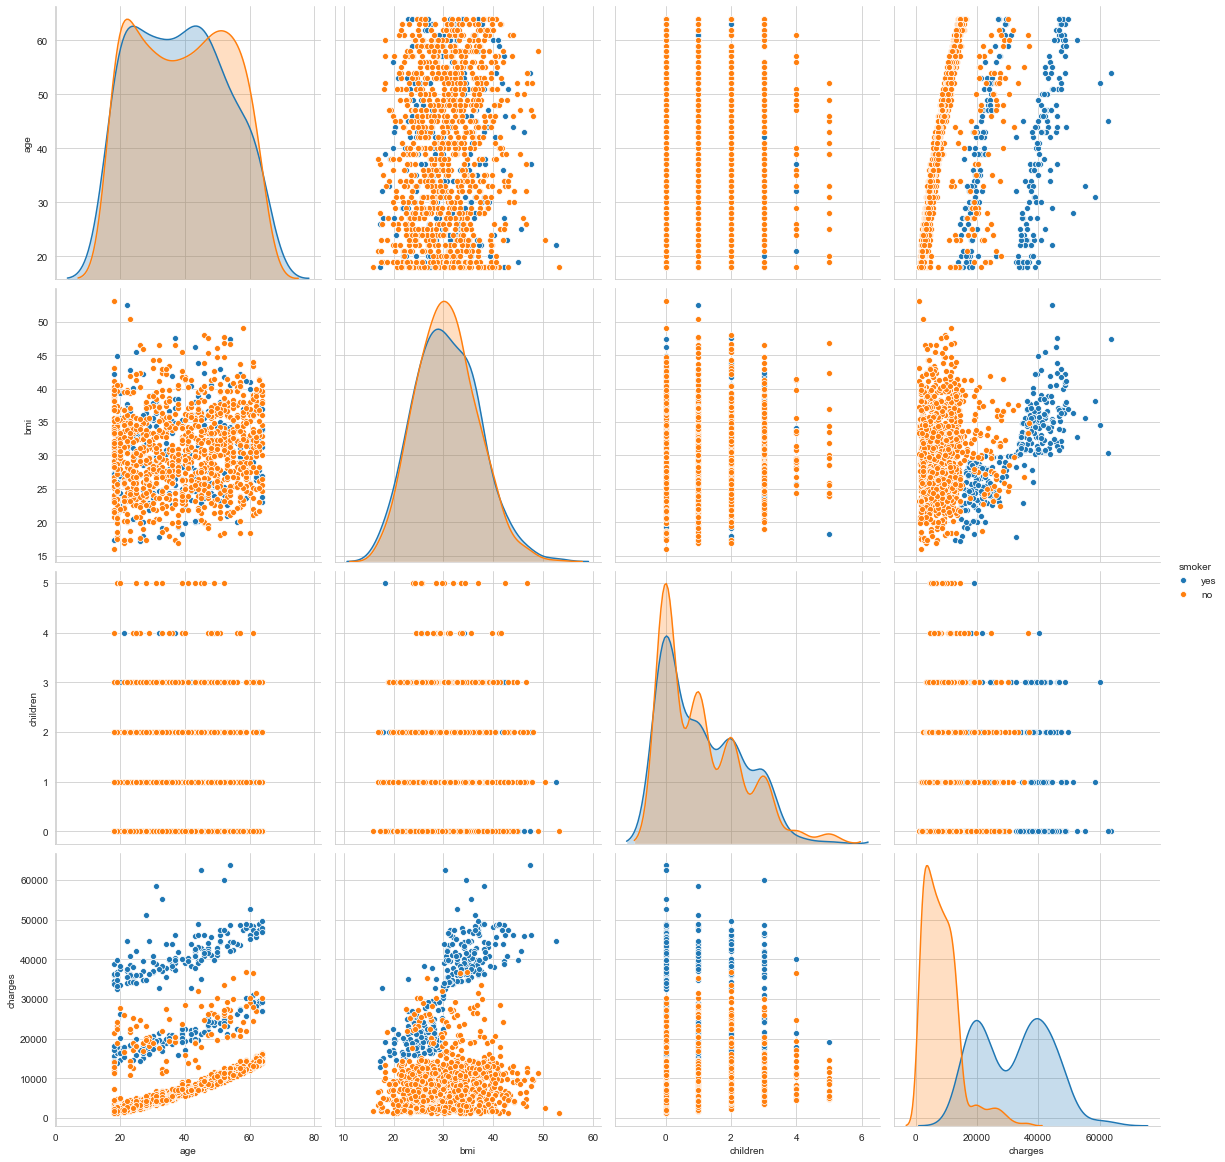

In [28]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, height=4,diag_kind="kde",hue ='smoker');
plt.show()

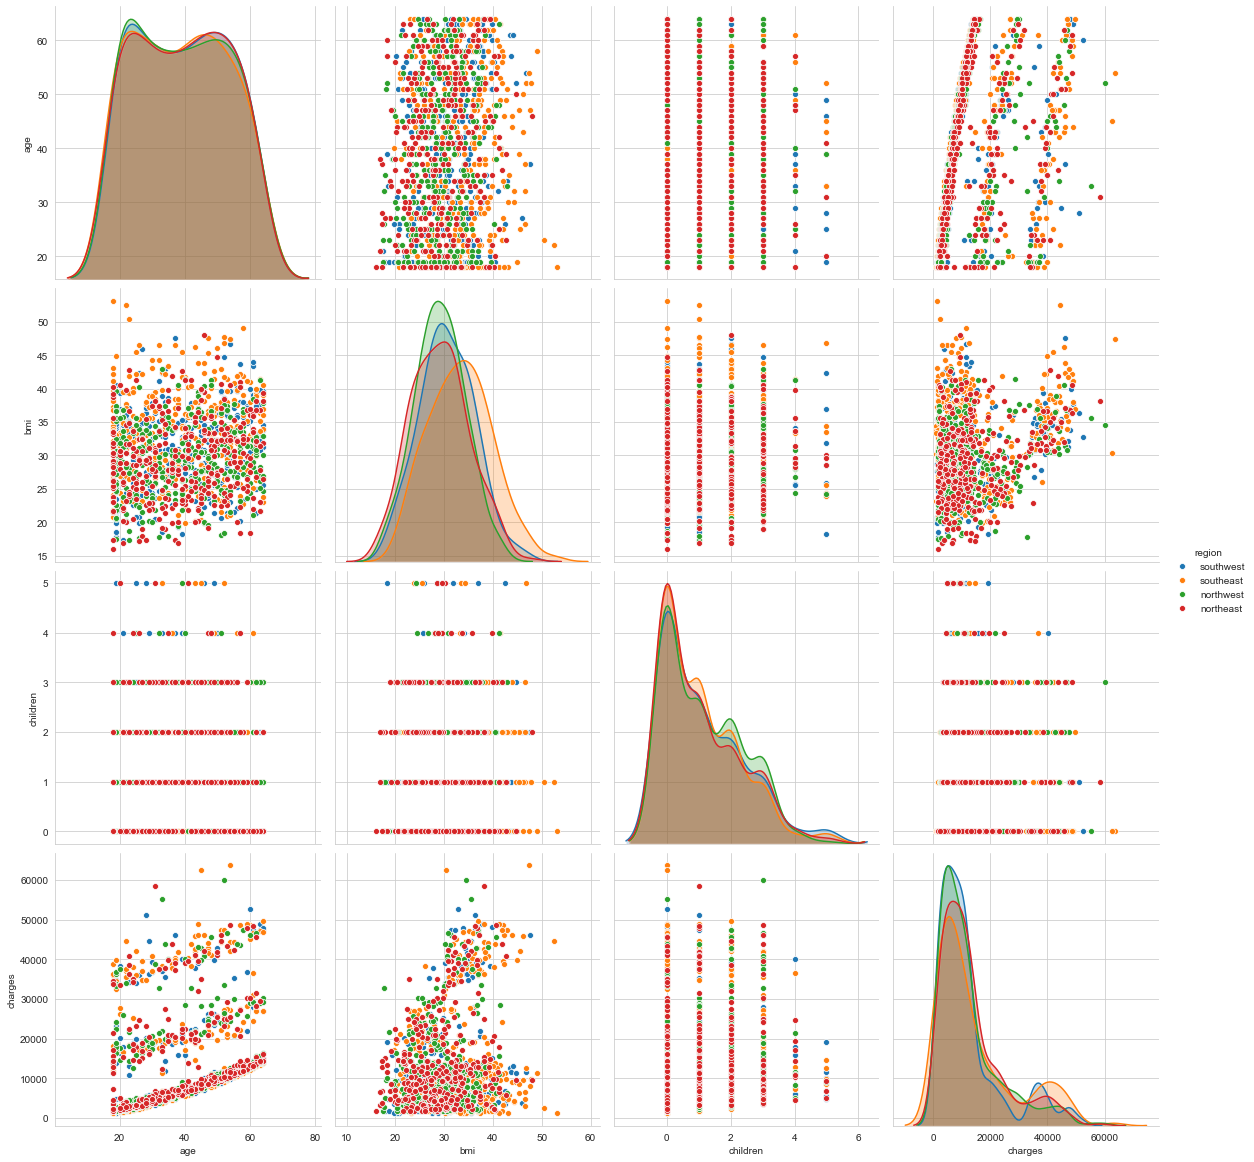

In [29]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, height=4,diag_kind="kde",hue ='region');
plt.show()

Region is not affecting the charges

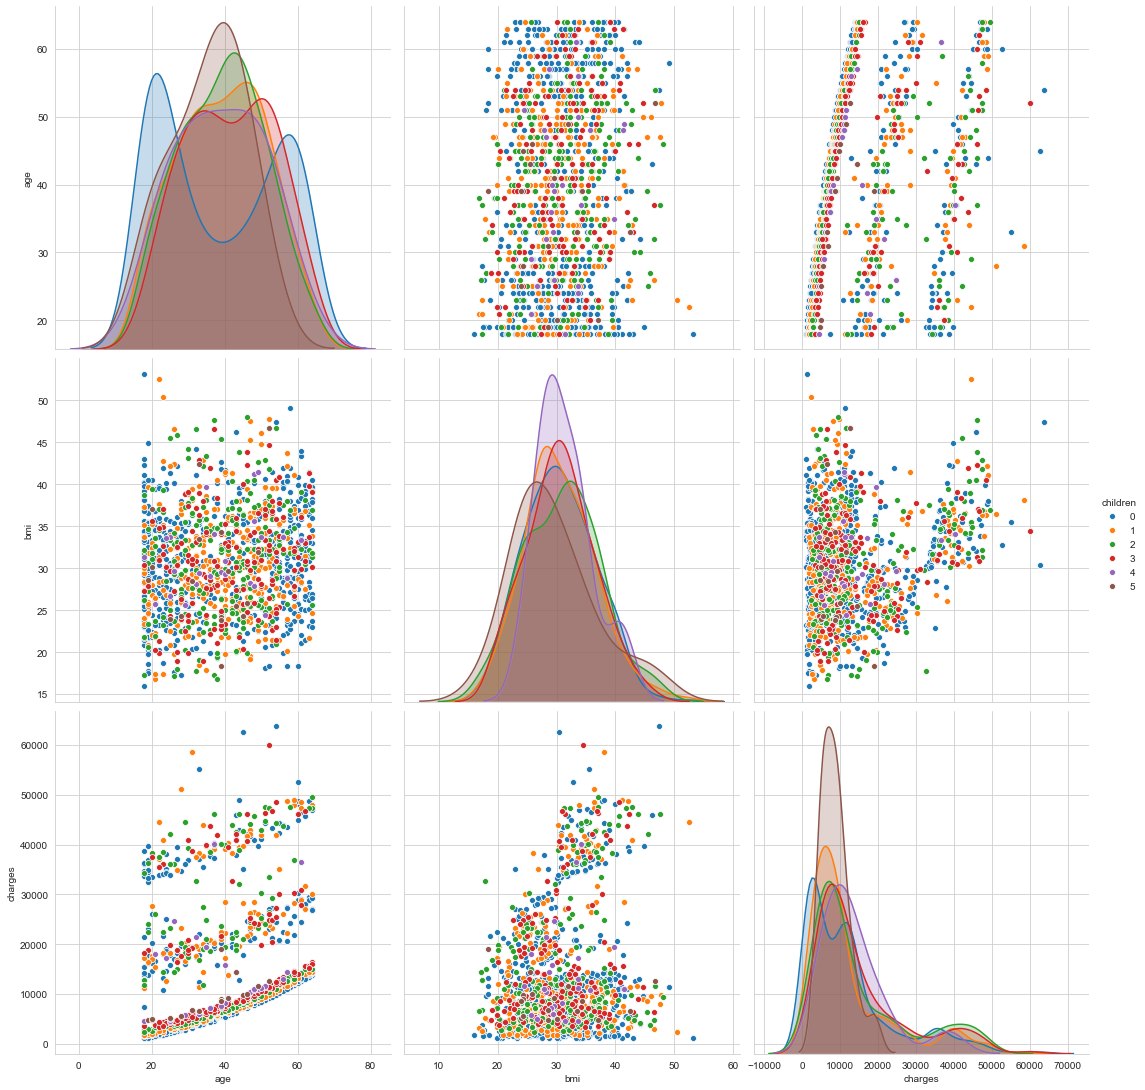

In [30]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, height=5,hue ='children');
plt.show()

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

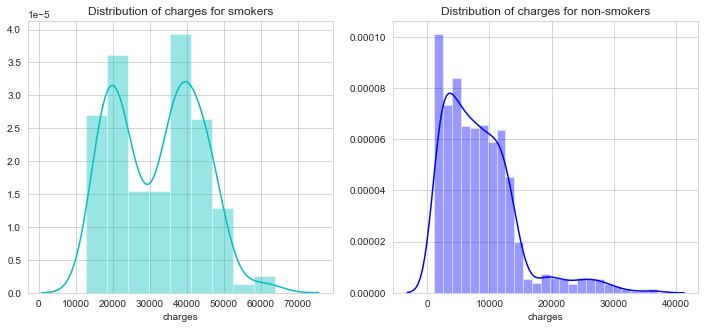

In [31]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

We can observe that smoker population distribution is high and across the charges range. Whereas, the non-smoker population distribution of charges is on the lower end of the graph.

Text(0.5, 1.0, 'Distribution of charges for northeast region')

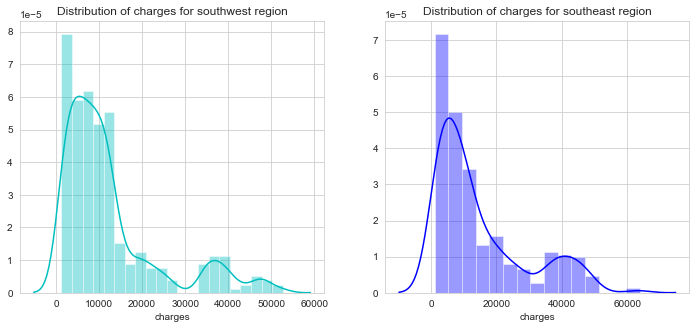

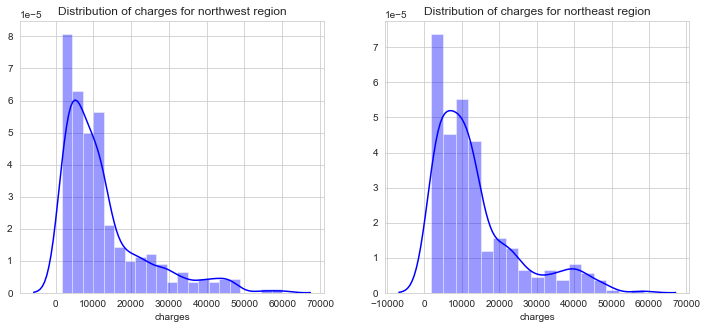

In [32]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.region == 'southwest')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for southwest region')

ax=f.add_subplot(122)
sns.distplot(data[(data.region == 'southeast')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for southeast region')

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.region == 'northwest')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for northwest region')

ax=f.add_subplot(122)
sns.distplot(data[(data.region == 'northeast')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for northeast region')

Split the columns to get numerical data for sex, region, smoker and children

In [33]:
data1=pd.get_dummies(data, columns=['sex','smoker'])

In [34]:
data1.head()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


Prepare x and y where x has independent variable and y has dependent variables

In [35]:
x = data1.copy()
x=x.drop(['charges','region','children'],1)
y = data1[['charges']]

So from the analysis we come to know that Region and children is not affecting the charges. So we drop these columns from the training dataset.

In [36]:
x.head() #Independent

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,1,0,0,1
1,18,33.770,0,1,1,0
2,28,33.000,0,1,1,0
3,33,22.705,0,1,1,0
4,32,28.880,0,1,1,0


In [37]:
y.head() #dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


Split data into training set and testing set for X and Y where test set is 20% of the complete dataset and training set is 80%. Random state is 25 to fetch random data from dataset 

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=25)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070, 1), (268, 1))

In [40]:
y_test.head()

,charges
748,8556.90700
633,7173.35995
651,10579.71100
411,19594.80965
502,22218.11490


In [41]:
y_train.head()

,charges
629,42983.458500
556,8334.589600
427,7323.734819
1047,44501.398200
98,22412.648500



# Creating model and fit training dataset into the model

In [42]:
model = LinearRegression()
model.fit(x_train,y_train)
predict_data=model.predict(x_test)

In [43]:
Result=x_test.copy()
Result['Actual'] = y_test
Result['Predicted'] = predict_data
Result=Result.drop(['age','bmi','sex_female','sex_male','smoker_no','smoker_yes'],1)

In [44]:
Result.head(10)

,Actual,Predicted
748,8556.90700,12253.263475
633,7173.35995,6146.390480
651,10579.71100,14975.798300
411,19594.80965,30554.711152
502,22218.11490,33336.587291
471,2203.47185,2805.142236
595,8823.98575,11259.726071
425,9788.86590,7965.620049
1103,11363.28320,15143.808461
1312,4536.25900,11091.976946


# Analysis of the predicted data

In [45]:
model.coef_

array([[ 2.60401201e+02,  3.22257671e+02, -1.75578444e-01,
         1.75578444e-01, -1.20815217e+04,  1.20815217e+04]])

In [46]:
model.intercept_

array([494.82814909])

# Score

In [101]:
r2_score(y_test,predict_data)

0.7617522336482346

In [102]:
model.score(x_test, y_test)

0.7617522336482346

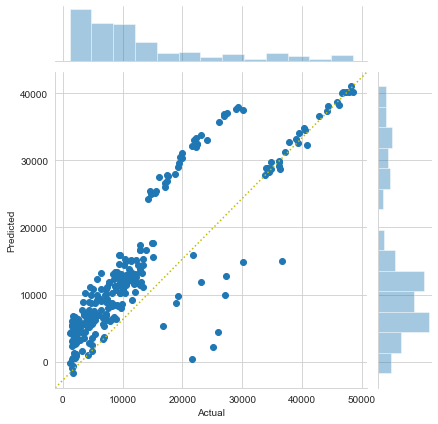

In [47]:
g = sns.jointplot(data=Result, x='Actual', y='Predicted')
g.ax_joint.plot([0,1], [0,1], ':y', transform=g.ax_joint.transAxes)
plt.show()

In [50]:
score = r2_score(y_test , predict_data)
print("R2 Score              : {}".format(score))
print("Accuracy of the Model : {}%".format(score * 100))

R2 Score              : 0.7617522336482346
Accuracy of the Model : 76.17522336482347%
